# **Written by Zachary Pulliam**
_____________________________________________________________________________________________________________________________________________________________________________________________

This notebook is used to visualize the equation created by the Regression class with the data for each Synthetic Dataset. Here you hsould change your ROOT directory, and can change
the polynomial order for each equation to be created.

_____________________________________________________________________________________________________________________________________________________________________________________________

Regression equation:   y = -3.957 + 11.149*x1 + 0.877*x2 + -3.833*x3 
MSE = 4.469

Regression equation:   y = 0.44 + -0.119*x1 + 0.299*x2 + 0.141*x3 + -0.214*x4 + 0.021*x5 + -0.229*x6 + -0.072*x7 + 0.075*x8 + 0.017*x9 
MSE = 0.064



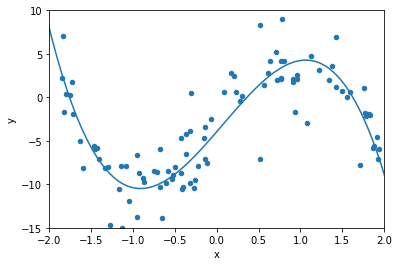

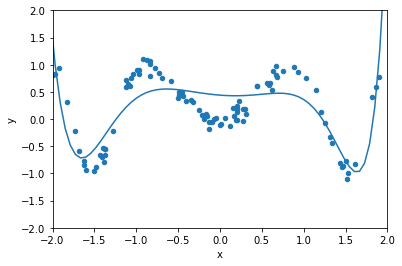

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt

from regression import Regression
from datasets import SyntheticDataset


"""Variables for the user to change"""
ROOT = ''  # path to data folder


"""Returns a polynomial for x values for the coeffs provided"""
def poly_coeffs(x, coeffs):

    power = len(coeffs)
    y = 0
    for i in range(power):
        y += coeffs[i]*x**i
    return y

# datasets
sd1 = SyntheticDataset(os.path.join(ROOT, 'synthetic-1.csv'), transform=None, poly=3)
sd2 = SyntheticDataset(os.path.join(ROOT, 'synthetic-2.csv'), transform=None, poly=9)

# regression for the SyntheticDataset #1
reg1 = Regression(sd1.x, sd1.y, alpha=0.01, lam=None, epochs=100000)
coeffs1 = reg1.theta.flatten().tolist()
reg1.mse(sd1.x, sd1.y)

# regression for the SyntheticDataset #2
reg2 = Regression(sd2.x, sd2.y, alpha=0.0001, lam=None, epochs=100000)
coeffs2 = reg2.theta.flatten().tolist()
reg2.mse(sd2.x, sd2.y)


# plotting SyntheticDataset #1 and regression equation
sd1.scaled_df.plot(x='x',y='y',kind='scatter')
x = np.linspace(-3, 3, 100)
plt.xlim(-2, 2)
plt.ylim(-15, 10)
plt.plot(x, poly_coeffs(x, coeffs1))

# plotting SyntheticDataset #2 and regression equation
sd2.scaled_df.plot(x='x',y='y',kind='scatter')
x = np.linspace(-3, 3, 100)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(x, poly_coeffs(x, coeffs2))